# Titanic.csv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

In [1]:
from google.colab import drive
drive.mount( '/content/drive' )

Mounted at /content/drive


In [39]:
train= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/202104AI_B_Workspace/titanic.csv")

In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Types of features in titanic

**Categorical**: is a collection of information that is divided into groups.
Eg. Embarked (C = Cherbourg; Q = Queenstown; S = Southampton)

**Ordinal**: They are similar to categorical features but they have an order.
Eg. Pclass (1, 2, 3)

**Binary**: A categrorical feature which has only 2 types of categories.Which is often represted as 0 and 1.
Eg: Sex (Male/Female)

**Continuous**: They can take up any value between the minimum and maximum values in a column.
Eg. Age, Fare

**Count**: They represent the count of a variable.
Eg. SibSp, Parch

In [41]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above,we can see that the age of passengers ranges between 0.4 to 80 years.And 38% of the people survived 
whose records are mentioned in this training set.

<h1><center>Titanic EDA</center></h1>

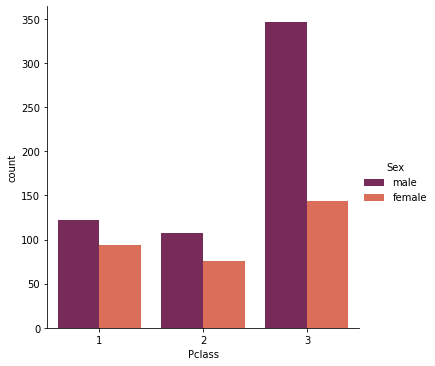

In [42]:
sns.catplot(x='Pclass', data=train,kind='count', hue='Sex',palette='rocket')

Class 3 males are more than 2x of women.

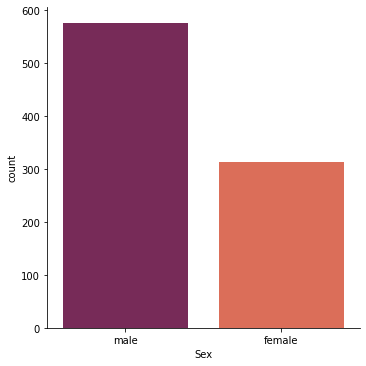

In [43]:
sns.catplot(x = 'Sex',data=train, kind='count',palette='rocket')

The number of male passengers are almost 2x of female passengers appox.

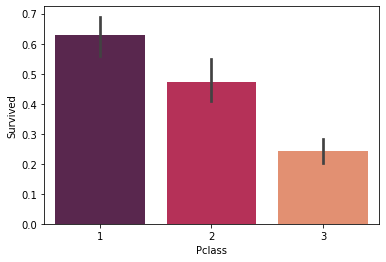

In [44]:
sns.barplot(x='Pclass', y='Survived', data=train,palette='rocket')

Here,we can see that person in class 1 has the higher chances of survival.Where as person in class 3 has lower chance.

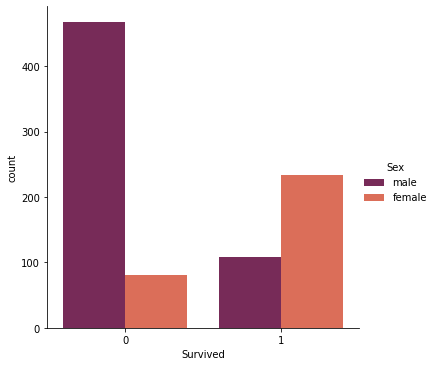

In [45]:
sns.catplot(x ='Survived',data=train, kind='count',hue='Sex',palette='rocket')

Despite the ship being male dominated.The survival rate of women is higher.As we can see that large number of women survived despite being minorities.

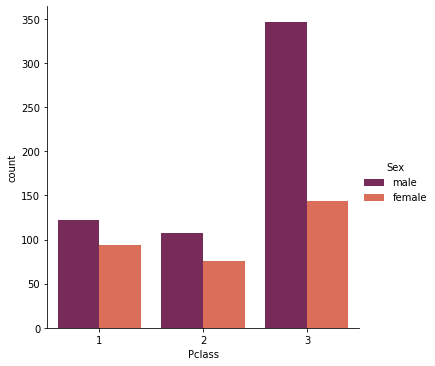

In [46]:
sns.catplot(x='Pclass', data=train,kind='count', hue='Sex',palette='rocket')

In class 3 males are more than 2x of women.

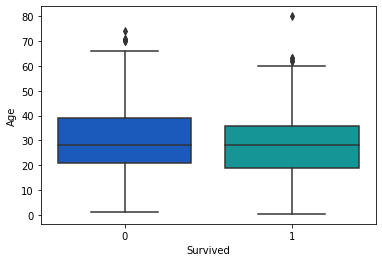

In [47]:
#Age
sns.boxplot(x='Survived',y='Age',data=train,palette='winter')

The average age of people seems to almost same for survived and dead.however we can observe some outliers

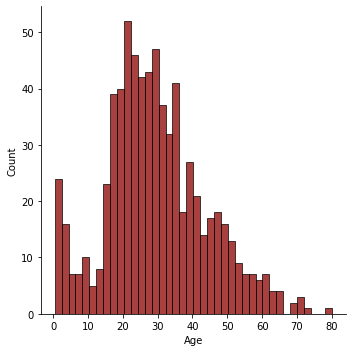

In [48]:
sns.displot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

Age distrubution in titanic traning dataset

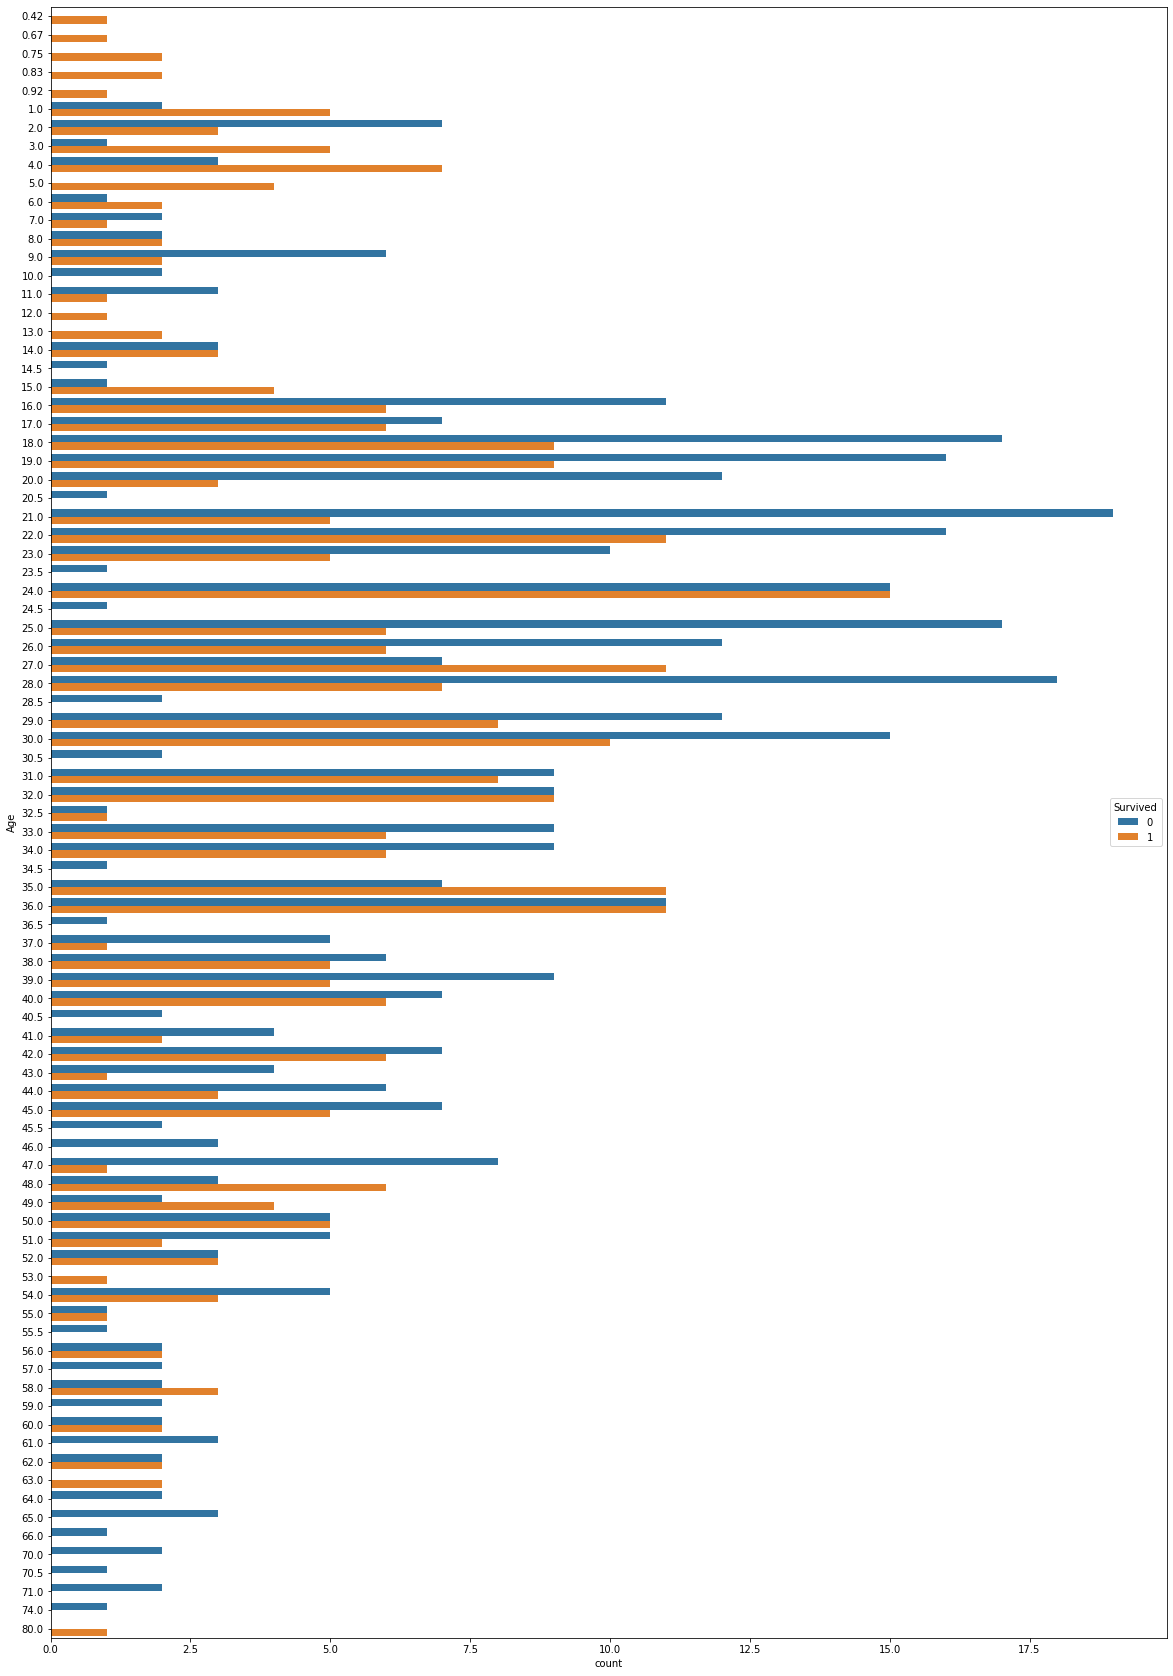

In [49]:
#Survival and dead distribution with respect to age
plt.figure(figsize=(20, 30))
sns.countplot(y = "Age",hue="Survived", data=train)

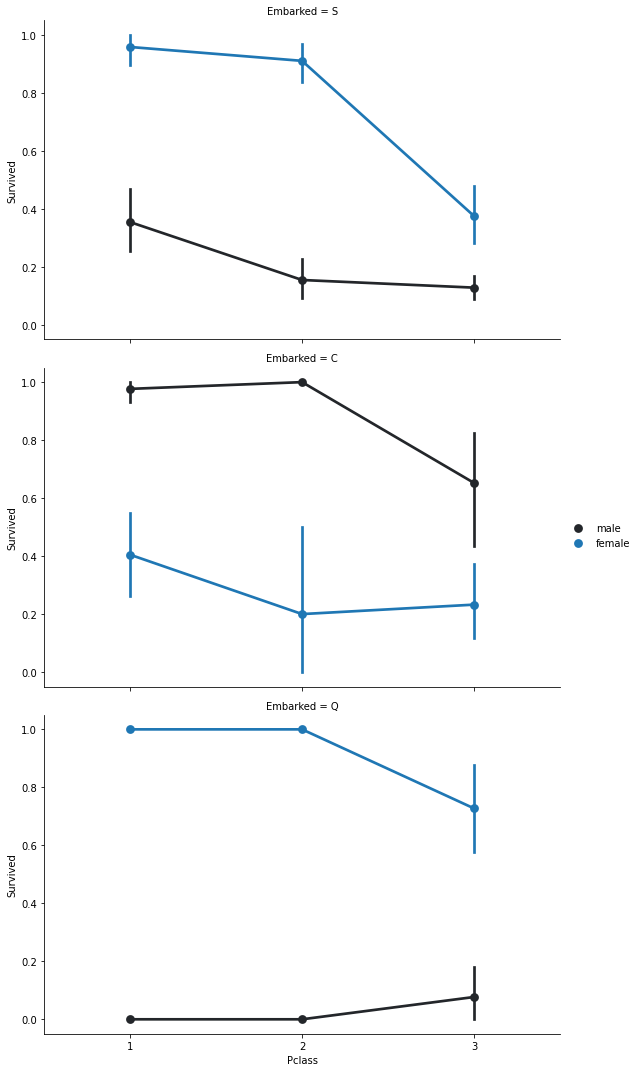

In [50]:
FacetGrid = sns.FacetGrid(train, row='Embarked', size=5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

Women on port Q and S has higher probability of surviving,Same cannot be said for the women on port C.The probability of men surviving is lower on port Q and S and it is higher in C.

In [51]:
print(train["SibSp"].value_counts())

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


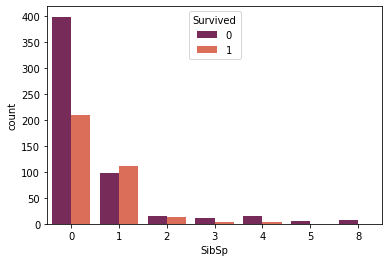

In [52]:
ax = sns.countplot(x = "SibSp",hue="Survived", data=train,palette='rocket')

From the above plot we can see that people with 0 and 1 Sibsp(Sibling or spouse) has greater chance of survival.Maybe because of sibsp with 0 or 1 were present in greater number.

<h1><center>Handling Missing values and imputing it</center></h1>

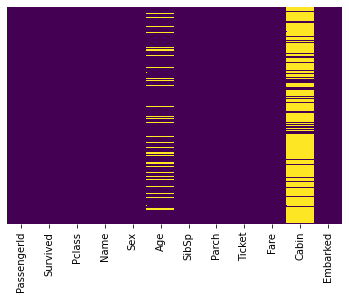

In [53]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

All the yellow lines that we see are missing values.We can see that majority of values are missing in cabin and age.

In [54]:
total = train.isnull().sum().sort_values(ascending=False)
total

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

These are the following missing values.

In [55]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
train.drop(['Name','Ticket','Cabin','Fare'],axis=1,inplace=True)

In [57]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,S
887,888,1,1,female,19.0,0,0,S
888,889,0,3,female,NaN,1,2,S
889,890,1,1,male,26.0,0,0,C


**Relation ship between PCLASS and AGE**

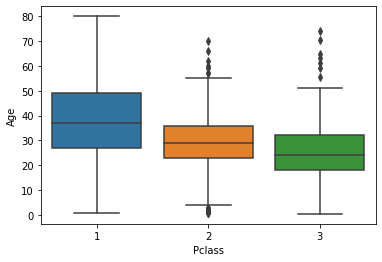

In [58]:
sns.boxplot(x='Pclass',y='Age',data=train)

Filling up mean values for null.

In [59]:
def impute_age_train(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else :
            return 24
    else:
        return Age

In [60]:
def impute_age_test(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 27
        else :
            return 25
    else:
        return Age

In [61]:
train['Age']=train[['Age','Pclass']].apply(impute_age_train,axis=1)

In [62]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

S is common in Embarked.We will fill null values with it.

In [63]:
common='S'
train['Embarked'] = train['Embarked'].fillna(common)

In [64]:
train.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

# Catogorical features

In [65]:
Embarked = pd.get_dummies(train['Embarked'],drop_first=True)
Embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [66]:
#Converting values
train['Sex']=train['Sex'].map({'male':0,'female':1})
train.drop(['Embarked'],axis=1,inplace=True)

In [67]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,0,22.0,1,0
1,2,1,1,1,38.0,1,0
2,3,1,3,1,26.0,0,0
3,4,1,1,1,35.0,1,0
4,5,0,3,0,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0
887,888,1,1,1,19.0,0,0
888,889,0,3,1,24.0,1,2
889,890,1,1,0,26.0,0,0


In [68]:
train = pd.concat([train,Embarked],axis=1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Q,S
0,1,0,3,0,22.0,1,0,0,1
1,2,1,1,1,38.0,1,0,0,0
2,3,1,3,1,26.0,0,0,0,1
3,4,1,1,1,35.0,1,0,0,1
4,5,0,3,0,35.0,0,0,0,1


In [69]:
train.loc[train['Age'] <= 16, 'Age'] = 0
train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age'] = 1
train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age'] = 2
train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age'] = 3
train.loc[ train['Age'] > 64, 'Age'] = 4

In [70]:
train= train.drop("PassengerId", axis = 1)